<a href="https://www.kaggle.com/code/mohdusaid/data-viz-using-matplotlib-seaborn-for-beginners?scriptVersionId=127808758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/lavanya321/mtcars/mtcars.csv


In [2]:
# importing essentail libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline                   

In [3]:
dfcars=pd.read_csv("/kaggle/input/d/lavanya321/mtcars/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# Renaming column 'Unnamed:0' to 'name'
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
# Creating column 'maker' by splitting column 'name' and taking only first string of it.
dfcars['maker'] = dfcars.name.apply(lambda x: x.split()[0])
dfcars['maker']

0        Mazda
1        Mazda
2       Datsun
3       Hornet
4       Hornet
5      Valiant
6       Duster
7         Merc
8         Merc
9         Merc
10        Merc
11        Merc
12        Merc
13        Merc
14    Cadillac
15     Lincoln
16    Chrysler
17        Fiat
18       Honda
19      Toyota
20      Toyota
21       Dodge
22         AMC
23      Camaro
24     Pontiac
25        Fiat
26     Porsche
27       Lotus
28        Ford
29     Ferrari
30    Maserati
31       Volvo
Name: maker, dtype: object

# Barchart

In [6]:
# Groupby dataframe by column 'maker' and taking mean of column 'mpg'
av_mpg = dfcars.groupby('maker').mpg.mean()
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

<AxesSubplot:ylabel='maker'>

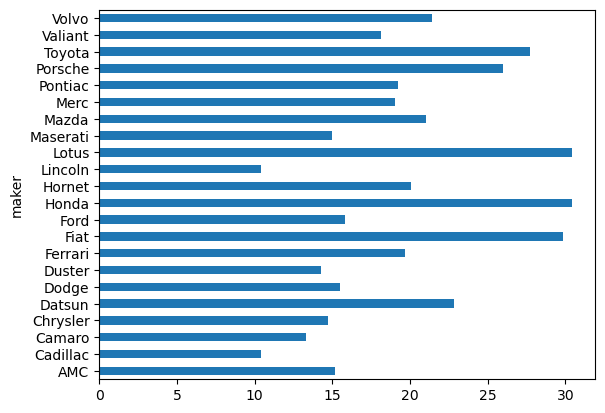

In [7]:
# horizontal bar graph showing mean 'mpg' values on x axis and 'maker' on y axis
av_mpg.plot(kind="barh")

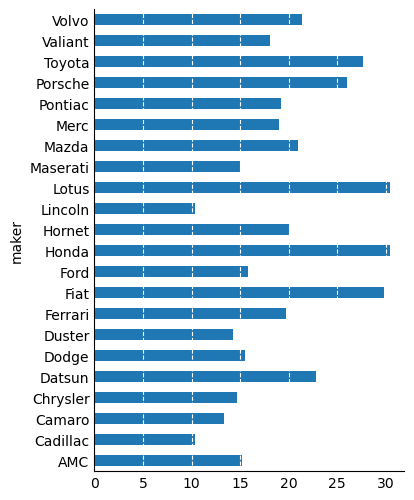

In [8]:
# more customized version with grid also
plt.figure(figsize=(4, 6))
ax = plt.gca()
av_mpg.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='--')
ax.tick_params(axis='both', which='both',length=0)
sns.despine()

# Histogram

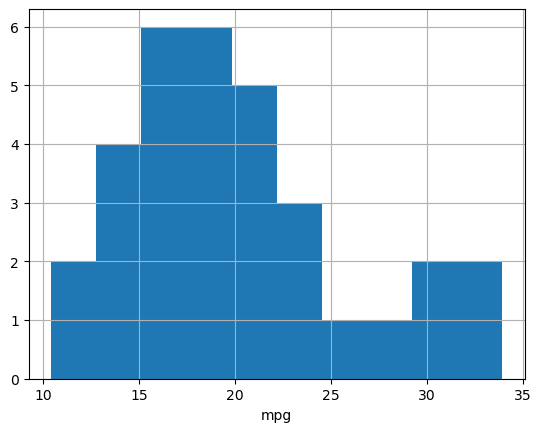

In [9]:
 
dfcars.mpg.hist()            
plt.xlabel("mpg");

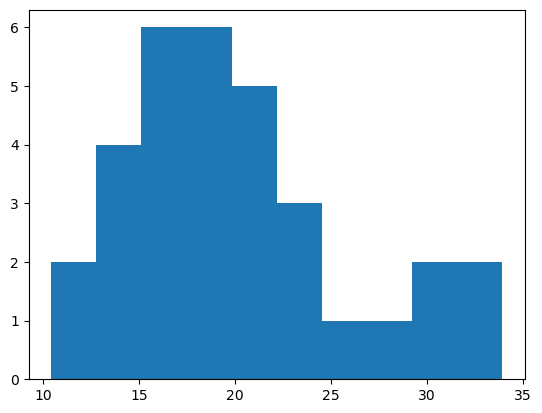

In [10]:

# another way
plt.hist(dfcars.mpg.values);             

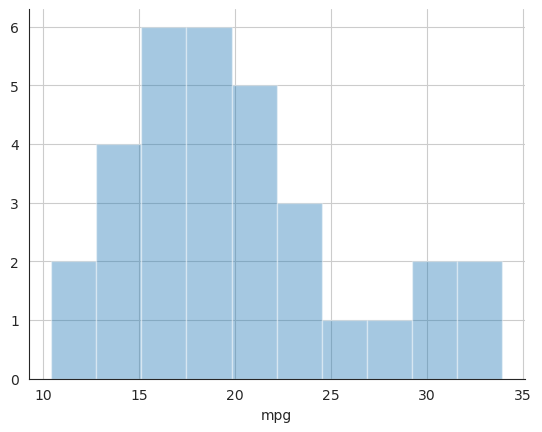

In [11]:
# with seaborn (more customized and visually impressive), alpha is used to set transparency level
with sns.axes_style("white"):                 
    dfcars.mpg.hist(alpha=0.4)
    plt.xlabel("mpg");
    sns.despine()

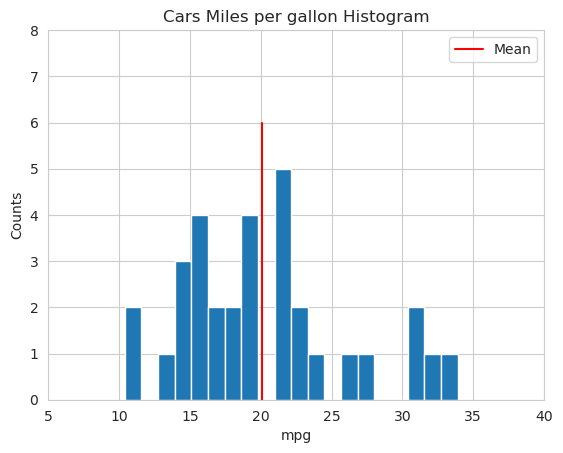

In [12]:
# still more with seaborn
with sns.axes_style("whitegrid"):
    plt.hist(dfcars.mpg.values, bins=20)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 0.75, color='r', label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


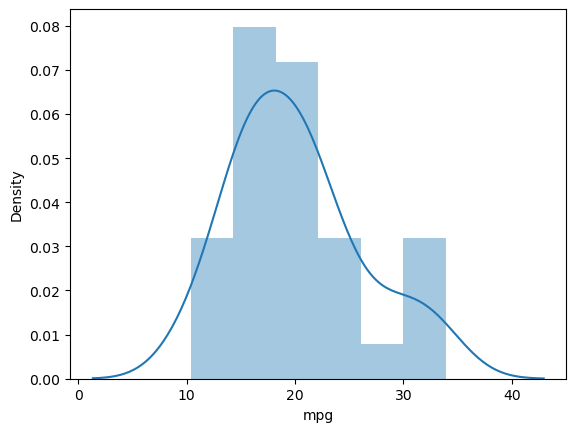

In [13]:
# histograms along with kde
sns.distplot(dfcars.mpg);     

# Scatter plot

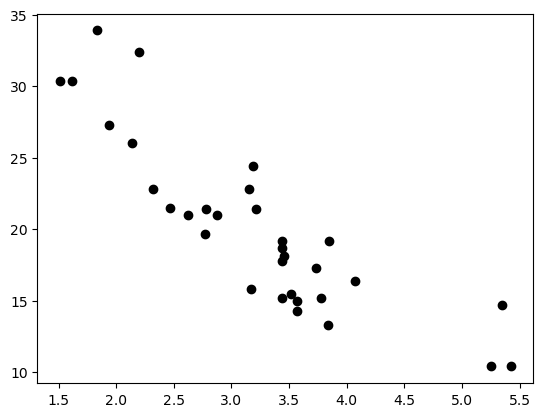

In [14]:
# scatterplots can be used to plot features against other features
plt.plot(dfcars.wt, dfcars.mpg, marker='o', linestyle='None', color='k');

# Boxplot

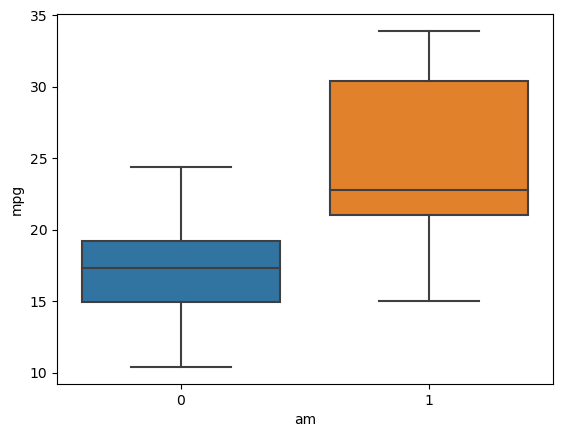

In [15]:
# A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='am', y='mpg', data=dfcars);

# violin plot

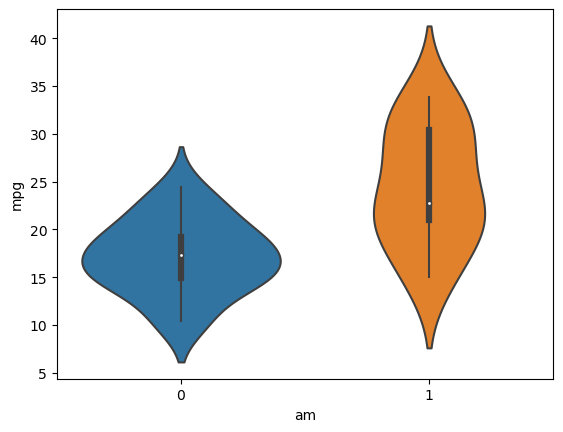

In [16]:
sns.violinplot(x='am', y='mpg', data=dfcars);

# FacetGrid

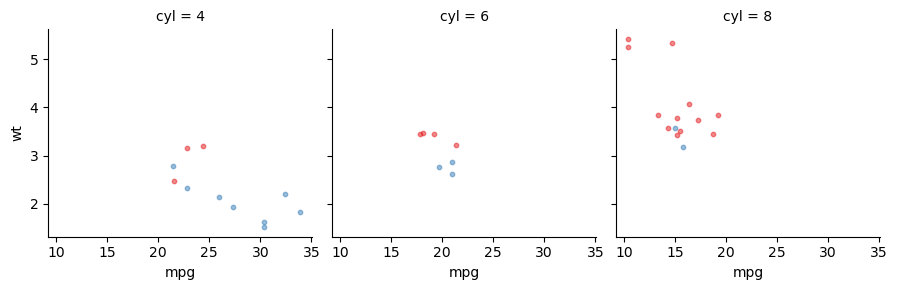

In [17]:
# Seaborn also provides a nice construct FacetGrid. Here is the facet plot of 'mpg' against 
# 'wt'. Hue is set to 'am' column.


g = sns.FacetGrid(dfcars, col="cyl", hue="am", palette="Set1")
g.map(plt.scatter, "mpg", "wt", alpha=0.5, s=10);
# s denotes size of markers

# Scatter matrix plot

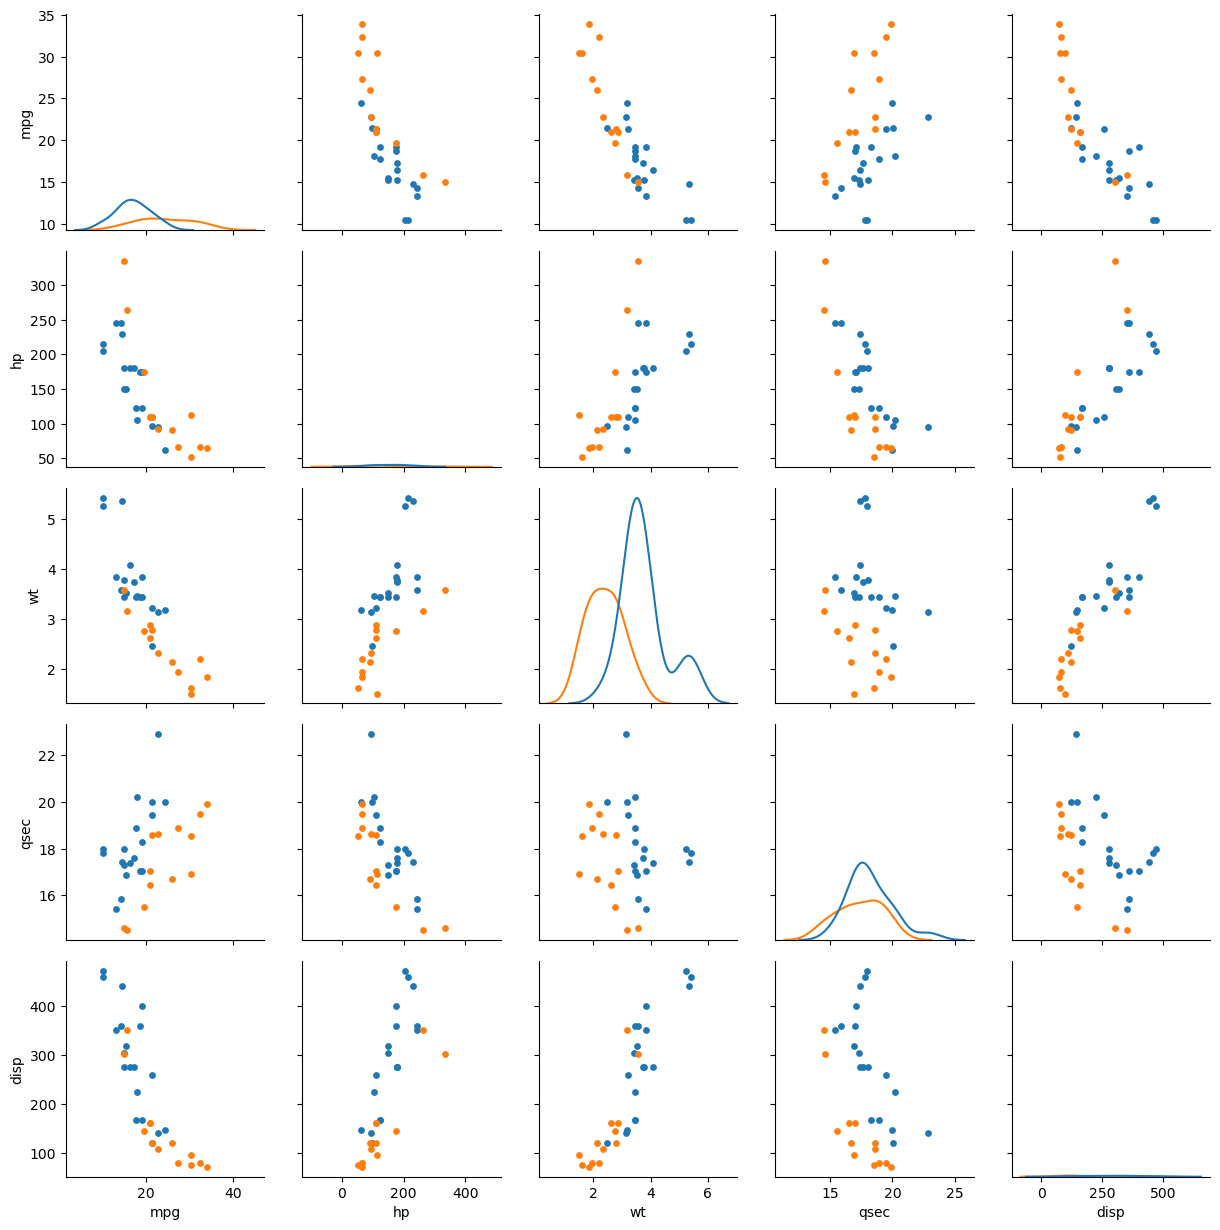

In [18]:
#  The PairGrid, colorable by transmission type, allows us to do this comparison for 5
# continuous features here, with the diagonal being a kernel density estimate
g = sns.PairGrid(dfcars, vars=['mpg', 'hp', 'wt', 'qsec', 'disp'], hue="am")
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15)

# Correlation

In [19]:
# From the above Scatter Matrix Plot, we can get some intuition about correlations. 
# Lets quantify them using correlation table
# correlations value range from -1 to 1 through 0
dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr()

,mpg,wt,hp,qsec,disp
mpg,1.000000,-0.867659,-0.776168,0.418684,-0.847551
wt,-0.867659,1.000000,0.658748,-0.174716,0.887980
hp,-0.776168,0.658748,1.000000,-0.708223,0.790949
qsec,0.418684,-0.174716,-0.708223,1.000000,-0.433698
disp,-0.847551,0.887980,0.790949,-0.433698,1.000000


In [20]:
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

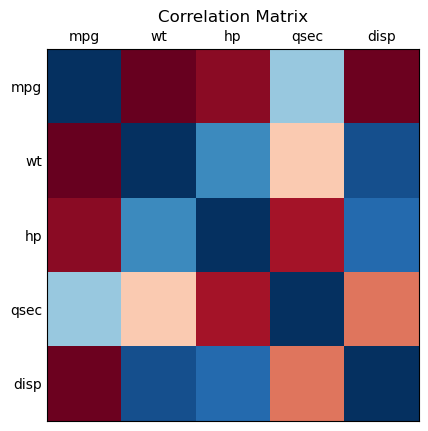

In [21]:
plt.matshow(dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);
plt.title("Correlation Matrix")
plt.xticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp'])
plt.yticks(range(5), ['mpg', 'wt', 'hp', 'qsec', 'disp']);

In [22]:
# Now lets a construct a simple dataframe just for our visualization purposes only
science = {
    'interest': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
    'before': [19, 25, 40, 5, 11],
    'after': [38, 30, 14, 6, 12]
}
dfscience = pd.DataFrame.from_dict(science).set_index("interest")[['before', 'after']]
dfscience

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


# Multiple Pie Charts

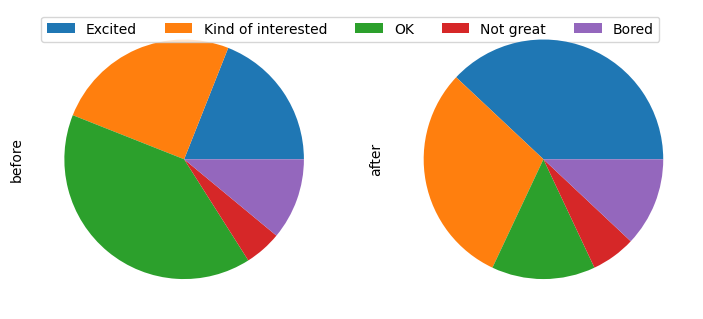

In [23]:
fig, axs = plt.subplots(1,2, figsize = (8.5,4))
dfscience.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=dfscience.index)
dfscience.after.plot(kind="pie", ax=axs[1], labels=None);

# Before and After Bar Charts

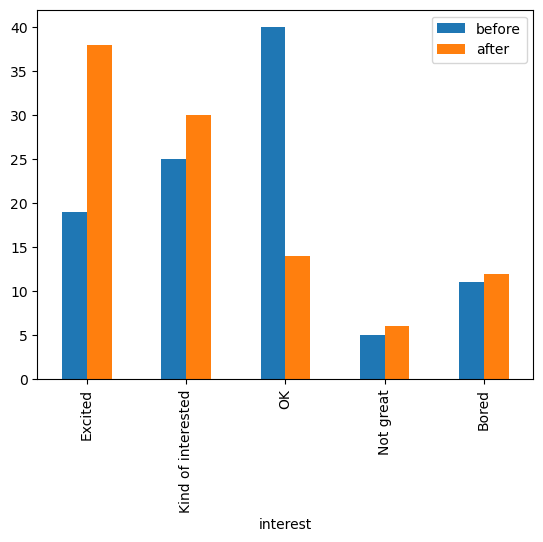

In [24]:
dfscience.plot(kind="bar");

In [25]:
# will continue to add more